In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
training = pd.read_csv('D:/titanic/train.csv')

In [78]:
test = pd.read_csv('D:/titanic/test.csv')

In [4]:
len(training)

891

In [5]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

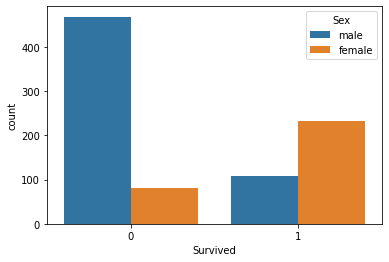

In [7]:
sns.countplot(x='Survived',data=training,hue='Sex')

In [8]:
#checking null val.

In [9]:
training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# imputing mean val
m = training['Age'].mean()

training['Age'].fillna(m,inplace=True)

In [11]:
training['Age'].isna().sum()

0

In [12]:
training.drop('Cabin',axis=1,inplace=True)

In [13]:
# convert to numerical
# one hot encoding
gender = pd.get_dummies(training['Sex'],drop_first=True)

In [14]:
training['Gender'] = gender

In [15]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [16]:
training.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [17]:
training.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [18]:
age_array = np.array(training['Age'])

In [19]:
norm_arr = preprocessing.normalize([age_array])

In [20]:
norm_df = pd.DataFrame()

for i in range(len(norm_arr)):
    norm_df[i] = pd.DataFrame(norm_arr[i])

In [21]:
norm_df

,0
0,0.022735
1,0.039270
2,0.026869
3,0.036170
4,0.036170
...,...
886,0.027903
887,0.019635
888,0.030692
889,0.026869


In [22]:
fare_array = np.array(training['Fare'])

In [23]:
fnorm_arr = preprocessing.normalize([fare_array])

In [24]:
fnorm_df = pd.DataFrame()

for i in range(len(norm_arr)):
    fnorm_df[i] = pd.DataFrame(fnorm_arr[i])

In [25]:
fnorm_df

,0
0,0.004103
1,0.040344
2,0.004485
3,0.030053
4,0.004556
...,...
886,0.007358
887,0.016979
888,0.013272
889,0.016979


In [26]:
training.drop(['Age','Fare'],axis=1,inplace=True)

In [27]:
training['Age'] = norm_df
training['Fare'] = fnorm_df

In [28]:
training.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Gender,Age,Fare
0,1,0,3,1,0,1,0.022735,0.004103
1,2,1,1,1,0,0,0.039270,0.040344
2,3,1,3,0,0,0,0.026869,0.004485
3,4,1,1,1,0,0,0.036170,0.030053
4,5,0,3,0,0,1,0.036170,0.004556


In [29]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Gender', 'Age',
       'Fare'],
      dtype='object')

In [30]:
# separate dep and independant var

In [31]:
x = training[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Gender', 'Age','Fare']]
y = training['Survived']

In [32]:
x

,PassengerId,Pclass,SibSp,Parch,Gender,Age,Fare
0,1,3,1,0,1,0.022735,0.004103
1,2,1,1,0,0,0.039270,0.040344
2,3,3,0,0,0,0.026869,0.004485
3,4,1,1,0,0,0.036170,0.030053
4,5,3,0,0,1,0.036170,0.004556
...,...,...,...,...,...,...,...
886,887,2,0,0,1,0.027903,0.007358
887,888,1,0,0,0,0.019635,0.016979
888,889,3,1,2,0,0.030692,0.013272
889,890,1,0,0,1,0.026869,0.016979


In [33]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
# train test split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
prediction = lr.predict(x_test)

In [40]:
#EVAL METRICS

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,prediction)

array([[158,  30],
       [ 33,  74]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       188
           1       0.71      0.69      0.70       107

    accuracy                           0.79       295
   macro avg       0.77      0.77      0.77       295
weighted avg       0.79      0.79      0.79       295



In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
gb = GaussianNB()

In [47]:
gb.fit(x_train,y_train)

GaussianNB()

In [48]:
prediction = gb.predict(x_test)

In [49]:
confusion_matrix(y_test,prediction)

array([[151,  37],
       [ 30,  77]], dtype=int64)

In [50]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       188
           1       0.68      0.72      0.70       107

    accuracy                           0.77       295
   macro avg       0.75      0.76      0.76       295
weighted avg       0.78      0.77      0.77       295



In [51]:
from sklearn.svm import SVC

In [52]:
svc = SVC()

In [53]:
svc.fit(x_train,y_train)

SVC()

In [54]:
prediction = svc.predict(x_test)

In [55]:
confusion_matrix(y_test,prediction)

array([[188,   0],
       [107,   0]], dtype=int64)

In [56]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       188
           1       0.00      0.00      0.00       107

    accuracy                           0.64       295
   macro avg       0.32      0.50      0.39       295
weighted avg       0.41      0.64      0.50       295



C:\Users\Karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [58]:
import xgboost as xgb

In [59]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_test, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [60]:
prediction = xgb_model.predict(x_test)

In [61]:
confusion_matrix(y_test,prediction)

array([[188,   0],
       [  0, 107]], dtype=int64)

In [62]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       107

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



In [64]:
test_ids = test['PassengerId']

In [81]:
test

,PassengerId,Pclass,SibSp,Parch,Gender,Age,Fare
0,892,3,0,0,1,0.051450,0.005786
1,893,3,1,0,0,0.070092,0.005173
2,894,2,0,0,1,0.092462,0.007160
3,895,3,0,0,1,0.040266,0.006402
4,896,3,1,1,0,0.032809,0.009081
...,...,...,...,...,...,...,...
413,1305,3,0,0,1,0.045146,0.005949
414,1306,1,0,0,0,0.058161,0.080483
415,1307,3,0,0,1,0.057416,0.005358
416,1308,3,0,0,1,0.045146,0.005949


In [76]:
training

,PassengerId,Survived,Pclass,SibSp,Parch,Gender,Age,Fare
0,1,0,3,1,0,1,0.022735,0.004103
1,2,1,1,1,0,0,0.039270,0.040344
2,3,1,3,0,0,0,0.026869,0.004485
3,4,1,1,1,0,0,0.036170,0.030053
4,5,0,3,0,0,1,0.036170,0.004556
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,1,0.027903,0.007358
887,888,1,1,0,0,0,0.019635,0.016979
888,889,0,3,1,2,0,0.030692,0.013272
889,890,1,1,0,0,1,0.026869,0.016979


In [80]:
#CLEANING TEST
gender = pd.get_dummies(test['Sex'],drop_first=True)
test['Gender'] = gender
test.drop(['Name','Sex','Ticket','Embarked','Cabin'],axis=1,inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)
age_array = np.array(test['Age'])
norm_arr = preprocessing.normalize([age_array])

norm_df = pd.DataFrame()

for i in range(len(norm_arr)):
    norm_df[i] = pd.DataFrame(norm_arr[i])

test['Fare'].fillna(value = test['Fare'].mean(),inplace=True)    

fare_array = np.array(test['Fare'])
fnorm_arr = preprocessing.normalize([fare_array])

fnorm_df = pd.DataFrame()

for i in range(len(norm_arr)):
    fnorm_df[i] = pd.DataFrame(fnorm_arr[i])

test.drop(['Age','Fare'],axis=1,inplace=True)

test['Age'] = norm_df
test['Fare'] = fnorm_df

In [92]:
submission_prediction = lr.predict(test)

In [93]:
sdf = pd.DataFrame({"PassengerId":test_ids.values,
                  "Survived":submission_prediction})

In [94]:
sdf.to_csv("submission.csv",index=False)

**Kaggle Submissions**
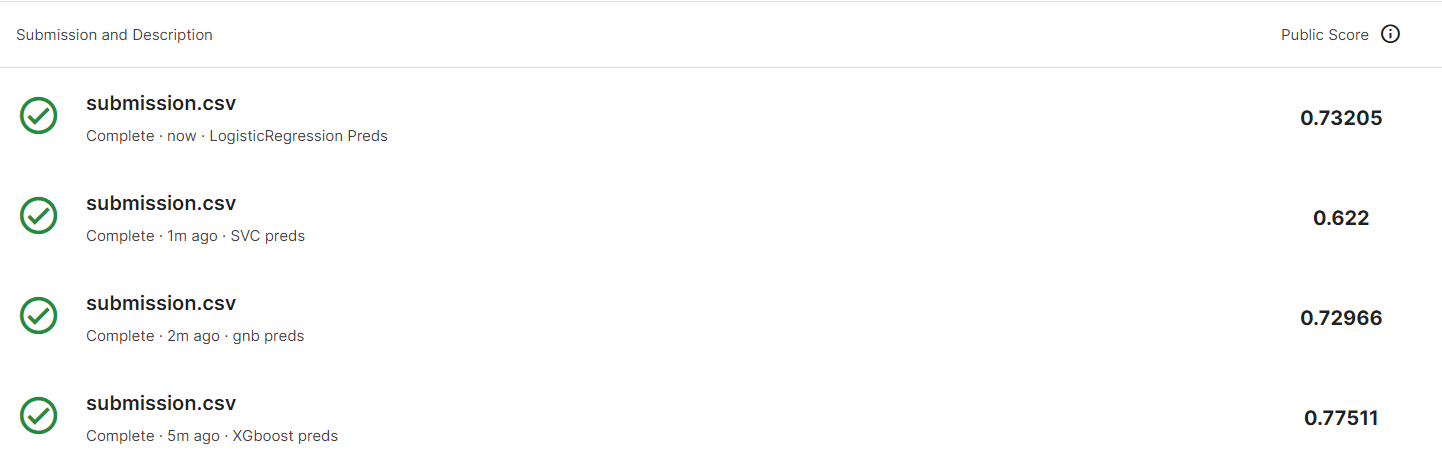